In [ ]:
# Author: Brandon Botzer
# Date: 1/15/2024
# Class: Penn State - AI 879

# Explain what a steerable filter is and apply it to Migrant Mother and Penn State images

In [1]:
# A steerable filter is a image filter that is designed to detect specific edges
#  or orientations in an image.  A Sobel filter is made up of two steerable filters,
#  one in the horizontal and one in the vertical, [[1,2,1],[0,0,0],[-1,-2,-1]] and
#  the transpose respectivly, which each pass over the image.  This is a first-order
#  derivative filter.

# The Laplacian filter [[0,1,0],[1,-4,1],[0,1,0]] uses a second-order derivative
#  to detect edges which allows it to detect the edges of an image in one pass.
#  The Laplacian looks at inensity change and is susceptible to noise.
#  A Gaussian filter is typically applied first to smooth the image and reduce noise.

# The Gabor filter uses a Gaussian kernel which is modulated by a sinusoidal phase wave.
#  The filter is made up of the wavelength of the phase wave, the orientatino of the wave,
#  the phase offset, the S.D. of the Gaussian kernel itself, and the spatal aspect ratio.
#  This modulation provides both real and imaginary parts.

# Below is Q2 where I implement filters: Sobel, Gaussian, Gabor

In [2]:
# Imports for functions

# The scikit-image package provides a wide variety of filter applications
#  which reduce the need to write out the corr / conv matricies

import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

# Check skimage version
print('skimage version: ', ski.__version__) # 0.22 is current stable release (1/15/2024)

skimage version:  0.22.0


In [3]:
# Load in images

migrant = ski.io.imread('L01 Migrant Mother.png')
greatvalley = ski.io.imread('L01 greatvalley.jpg', as_gray=True)

# Convert these both to floats to make filters easier to deal with
migrant = ski.util.img_as_float(migrant)
greatvalley = ski.util.img_as_float(greatvalley)

In [4]:
migrant.shape

(3324, 2112, 3)

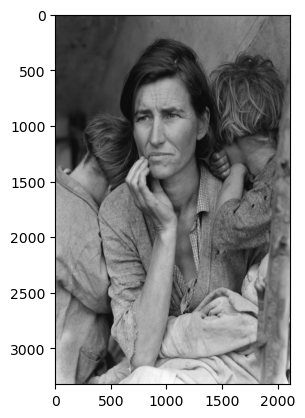

In [5]:
plt.imshow(migrant)

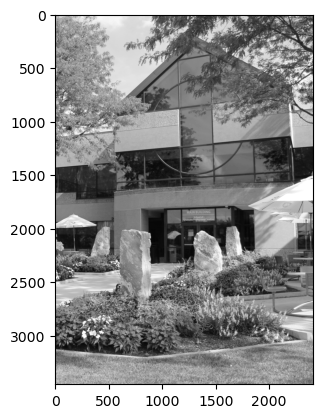

In [6]:
plt.imshow(greatvalley, cmap='gray')

# Sobel Edge Detection Filter

In [7]:
# The Sobel detection filter for each image

migrant_sobel = ski.filters.sobel(migrant)
greatvalley_sobel = ski.filters.sobel(greatvalley)

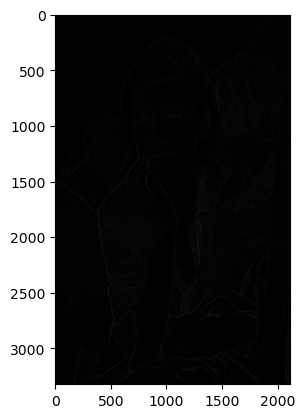

In [8]:
plt.imshow(migrant_sobel)

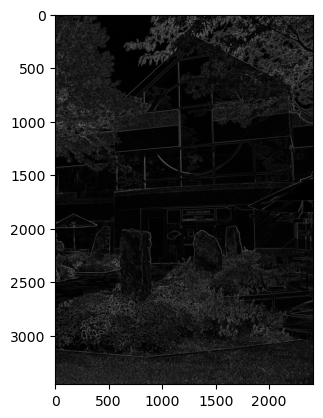

In [9]:
plt.imshow(greatvalley_sobel, cmap='gray')

# Laplacian Filter

In [10]:
# The Laplacian filter
#  Requires the smoothing of the image with a Gaussian

# Using the matlab default of 0.5 or the scikit-image default of 1.0
#  did not allow the edges to be resolved in the Laplace image.
#  Blurring the image further with a high sigma allowed the edges to be seen.

migrant_gaussed = ski.filters.gaussian(migrant, sigma=1, channel_axis=-1)

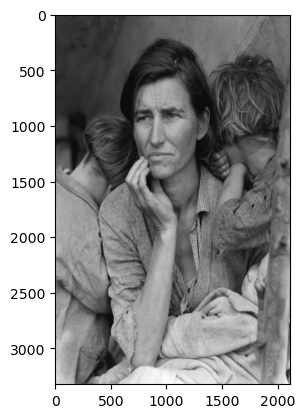

In [11]:
plt.imshow(migrant_gaussed)

# Gabor Filter

In [12]:
# Convert to grayscale for Gabor filter
migrant_gray = ski.color.rgb2gray(migrant)

migrant_gray.shape

(3324, 2112)

In [13]:
# Apply the Gabor filter
migrant_gabor = ski.filters.gabor(migrant_gray , frequency=0.5)

In [14]:
# See the output
migrant_gabor

(array([[0.00103089, 0.00011036, 0.00171854, ..., 0.0019543 , 0.00207712,
         0.00256046],
        [0.00101417, 0.00018185, 0.00160159, ..., 0.00194112, 0.00218843,
         0.00242238],
        [0.00095952, 0.0004186 , 0.00121719, ..., 0.00183671, 0.00234839,
         0.00224328],
        ...,
        [0.00352134, 0.00325613, 0.00420614, ..., 0.00327484, 0.00250004,
         0.00302401],
        [0.00352761, 0.00324288, 0.00421541, ..., 0.00331782, 0.00257402,
         0.00298725],
        [0.00352802, 0.00324203, 0.004216  , ..., 0.00327207, 0.00266832,
         0.00295317]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

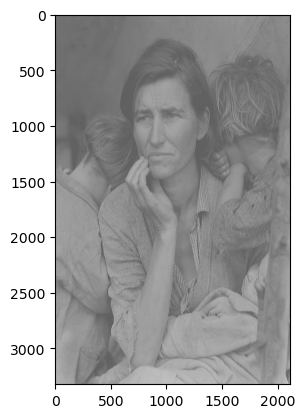

In [15]:
# Real Parts of the Gabor
plt.imshow(migrant_gabor[0], cmap='gray')

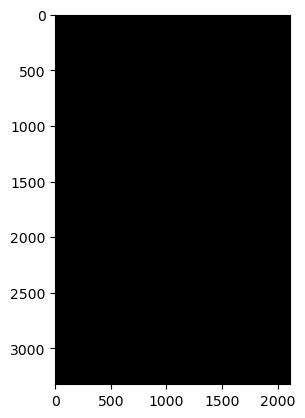

In [16]:
# Imaginary parts of the Gabor
plt.imshow(migrant_gabor[1], cmap='gray')